In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Dataset = pd.read_csv('train_news.csv')

In [2]:
Dataset.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [3]:
#Removing duplicates
Dataset.drop_duplicates(inplace = True)

In [4]:
#check for null values
Dataset.isnull().sum()

Unnamed: 0       0
id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

In [5]:
Dataset.shape

(20800, 6)

In [6]:
#drop null values
d1 = Dataset.dropna()
d1.shape

(18285, 6)

In [7]:
d2 = d1.copy()

In [8]:
d2.reset_index(inplace=True)

In [9]:
d2['headline'][4]

'A Digital 9/11 If Trump Wins'

In [10]:
print("Samples per class: {}".format(np.bincount(d2.label)))

Samples per class: [10361  7924]


In [11]:
#Text Cleaning
import re
import string

from nltk.corpus import stopwords

# Using Lemmatizer.
from nltk.stem import WordNetLemmatizer
WL = WordNetLemmatizer()

corpus = []

for i in range(0, len(d2)):
    
    #Remove Unicode characters
    #TITLE = re.sub(r'[^\x00-\x7F]+', '', TITLE)
    TITLE = re.sub('[^a-zA-Z]', ' ', d2['headline'][i])

    #Convert to lowercase to maintain consistency
    TITLE = TITLE.lower()
    TITLE = TITLE.split()
    TITLE = [WL.lemmatize(word) for word in TITLE if not word in stopwords.words('english')]

    TITLE = ' '.join(TITLE)
    corpus.append(TITLE)

In [12]:
corpus

['ethic question dogged agriculture nominee georgia governor new york time',
 'u must dig deep stop argentina lionel messi new york time',
 'cotton house walk plank vote bill cannot pas senate breitbart',
 'paul lepage besieged maine governor sends conflicting signal intention new york time',
 'digital trump win',
 'rapid evolution saved fish pollution study say new york time',
 'alabama prison official retaliate prison strike leader cutting water cell',
 'live constant state love',
 'hillary closet drunk new wikileak email reveals aid asking sober day',
 'bloomberg backed pennsylvania attorney general sentenced month prison',
 'video le pen pelted egg keep smiling',
 'donald trump candidate american special interest',
 'wharton business school backer seek distance donald trump new york time',
 'brexit ruling latest tactic block people',
 'million south korean rise shadow government',
 'chelsea manning asks obama cut sentence time served new york time',
 'city vow fight trump immigrati

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

#create the transform
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

In [14]:
#summarize
print(cv.vocabulary_)

{'ethic': 5257, 'question': 12350, 'dogged': 4509, 'agriculture': 308, 'nominee': 10533, 'georgia': 6389, 'governor': 6576, 'new': 10429, 'york': 17371, 'time': 15674, 'must': 10213, 'dig': 4239, 'deep': 3847, 'stop': 14901, 'argentina': 794, 'lionel': 9012, 'messi': 9721, 'cotton': 3337, 'house': 7353, 'walk': 16814, 'plank': 11623, 'vote': 16763, 'bill': 1540, 'cannot': 2254, 'pas': 11231, 'senate': 13859, 'breitbart': 1911, 'paul': 11280, 'lepage': 8880, 'besieged': 1477, 'maine': 9295, 'sends': 13863, 'conflicting': 3099, 'signal': 14162, 'intention': 7889, 'digital': 4244, 'trump': 15997, 'win': 17132, 'rapid': 12483, 'evolution': 5326, 'saved': 13602, 'fish': 5832, 'pollution': 11759, 'study': 14992, 'say': 13612, 'alabama': 361, 'prison': 12029, 'official': 10753, 'retaliate': 13051, 'strike': 14960, 'leader': 8788, 'cutting': 3616, 'water': 16904, 'cell': 2426, 'live': 9041, 'constant': 3166, 'state': 14794, 'love': 9154, 'hillary': 7168, 'closet': 2799, 'drunk': 4670, 'wikilea

In [15]:
print(cv.get_params())

{'analyzer': 'word', 'binary': False, 'decode_error': 'strict', 'dtype': <class 'numpy.int64'>, 'encoding': 'utf-8', 'input': 'content', 'lowercase': True, 'max_df': 1.0, 'max_features': None, 'min_df': 1, 'ngram_range': (1, 1), 'preprocessor': None, 'stop_words': None, 'strip_accents': None, 'token_pattern': '(?u)\\b\\w\\w+\\b', 'tokenizer': None, 'vocabulary': None}


In [16]:
feature_names = cv.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features: {}".format(feature_names[:20]))
print("Every 2000th feature: {}".format(feature_names[::2000]))

Number of features: 17467
First 20 features: ['aa', 'aaa', 'aap', 'aaron', 'ab', 'abandon', 'abandonados', 'abandoned', 'abandoning', 'abbas', 'abbott', 'abby', 'abc', 'abd', 'abdel', 'abdeslam', 'abdicate', 'abducted', 'abducting', 'abduction']
Every 2000th feature: ['aa', 'brotherjohnf', 'denounced', 'forecast', 'invokes', 'money', 'pride', 'sharia', 'trumpess']


In [17]:
y=d2['label']

In [18]:
## Divide the dataset into Train and Test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
print("Samples per class: {}".format(np.bincount(y_train)))
print("Samples per class: {}".format(np.bincount(y_test)))

Samples per class: [6948 5302]
Samples per class: [3413 2622]


In [29]:
import matplotlib.pyplot as plt
from sklearn import metrics
from collections import Counter

from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [21]:
# Instantiate catboost for classification
cat_boost = CatBoostClassifier(iterations=200, depth=6, learning_rate=0.03, 
                               l2_leaf_reg=3, loss_function='Logloss')

# Fit the classifier to the training data
cat_boost.fit(X_train, y_train)

# make predictions for test data
y_pred = cat_boost.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

0:	learn: 0.6475611	total: 196ms	remaining: 39.1s
1:	learn: 0.6072347	total: 253ms	remaining: 25s
2:	learn: 0.5711909	total: 308ms	remaining: 20.2s
3:	learn: 0.5392670	total: 363ms	remaining: 17.8s
4:	learn: 0.5109483	total: 416ms	remaining: 16.2s
5:	learn: 0.4860559	total: 464ms	remaining: 15s
6:	learn: 0.4639040	total: 501ms	remaining: 13.8s
7:	learn: 0.4442970	total: 539ms	remaining: 12.9s
8:	learn: 0.4268210	total: 575ms	remaining: 12.2s
9:	learn: 0.4113908	total: 630ms	remaining: 12s
10:	learn: 0.3961040	total: 686ms	remaining: 11.8s
11:	learn: 0.3840975	total: 740ms	remaining: 11.6s
12:	learn: 0.3734080	total: 765ms	remaining: 11s
13:	learn: 0.3620744	total: 822ms	remaining: 10.9s
14:	learn: 0.3536553	total: 876ms	remaining: 10.8s
15:	learn: 0.3459069	total: 929ms	remaining: 10.7s
16:	learn: 0.3388548	total: 982ms	remaining: 10.6s
17:	learn: 0.3326893	total: 1.03s	remaining: 10.5s
18:	learn: 0.3279316	total: 1.09s	remaining: 10.4s
19:	learn: 0.3235246	total: 1.13s	remaining: 10.2

161:	learn: 0.2201434	total: 8.56s	remaining: 2.01s
162:	learn: 0.2199969	total: 8.6s	remaining: 1.95s
163:	learn: 0.2198366	total: 8.65s	remaining: 1.9s
164:	learn: 0.2195877	total: 8.7s	remaining: 1.84s
165:	learn: 0.2194202	total: 8.75s	remaining: 1.79s
166:	learn: 0.2192692	total: 8.8s	remaining: 1.74s
167:	learn: 0.2191537	total: 8.85s	remaining: 1.69s
168:	learn: 0.2190342	total: 8.89s	remaining: 1.63s
169:	learn: 0.2189372	total: 8.93s	remaining: 1.58s
170:	learn: 0.2188203	total: 8.97s	remaining: 1.52s
171:	learn: 0.2186890	total: 9.01s	remaining: 1.47s
172:	learn: 0.2186009	total: 9.04s	remaining: 1.41s
173:	learn: 0.2185111	total: 9.09s	remaining: 1.36s
174:	learn: 0.2183780	total: 9.15s	remaining: 1.31s
175:	learn: 0.2182614	total: 9.2s	remaining: 1.25s
176:	learn: 0.2181408	total: 9.25s	remaining: 1.2s
177:	learn: 0.2179834	total: 9.3s	remaining: 1.15s
178:	learn: 0.2177475	total: 9.36s	remaining: 1.1s
179:	learn: 0.2176067	total: 9.41s	remaining: 1.04s
180:	learn: 0.217447

In [22]:
cm = confusion_matrix(y_test,y_pred)
cm_Df = pd.DataFrame(cm, index=['real', 'fake'], columns= ['real', 'fake'], )
cm_Df.head()

,real,fake
real,2912,501
fake,23,2599


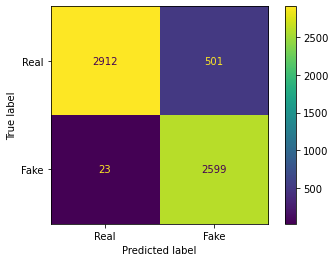

In [23]:
target_names = ['Real', 'Fake']

plot_confusion_matrix(cat_boost, X_test, y_test, display_labels=target_names)
plt.show()

In [24]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Real       0.99      0.85      0.92      3413
        Fake       0.84      0.99      0.91      2622

    accuracy                           0.91      6035
   macro avg       0.92      0.92      0.91      6035
weighted avg       0.93      0.91      0.91      6035



In [25]:
# Instantiate Decision Tree for classification
Dec_tree = DecisionTreeClassifier(max_depth=10, min_samples_split=20, min_samples_leaf=10,
                                  max_features = 'sqrt', criterion = 'entropy')

# Fit the classifier to the training data
Dec_tree.fit(X_train, y_train)

# make predictions for test data
y_pred = Dec_tree.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 60.38%


In [26]:
cm = confusion_matrix(y_test,y_pred)
cm_Df = pd.DataFrame(cm, index=['real', 'fake'], columns= ['real', 'fake'], )
cm_Df.head()

,real,fake
real,3361,52
fake,2339,283


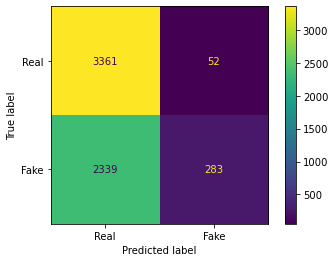

In [27]:
target_names = ['Real', 'Fake']
plot_confusion_matrix(Dec_tree, X_test, y_test, display_labels=target_names)
plt.show()

In [28]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Real       0.59      0.98      0.74      3413
        Fake       0.84      0.11      0.19      2622

    accuracy                           0.60      6035
   macro avg       0.72      0.55      0.46      6035
weighted avg       0.70      0.60      0.50      6035



In [30]:
# Instantiate Decision Tree for classification
R_forest = RandomForestClassifier(max_depth=10, min_samples_split=20, min_samples_leaf=10,
                                  criterion = 'entropy')

# Fit the classifier to the training data
R_forest.fit(X_train, y_train)

# make predictions for test data
y_pred = R_forest.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 69.38%


In [31]:
cm = confusion_matrix(y_test,y_pred)
cm_Df = pd.DataFrame(cm, index=['real', 'fake'], columns= ['real', 'fake'], )
cm_Df.head()

,real,fake
real,3383,30
fake,1818,804


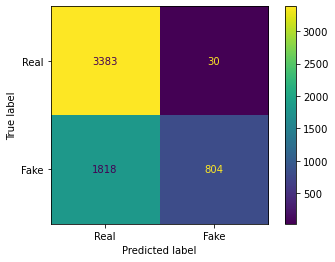

In [32]:
target_names = ['Real', 'Fake']
plot_confusion_matrix(R_forest, X_test, y_test, display_labels=target_names)
plt.show()

In [33]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Real       0.65      0.99      0.79      3413
        Fake       0.96      0.31      0.47      2622

    accuracy                           0.69      6035
   macro avg       0.81      0.65      0.63      6035
weighted avg       0.79      0.69      0.65      6035

